## Image Filtering

In [79]:
from scipy.ndimage import correlate
import numpy as np
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import pydicom as dicom
from skimage.filters import median, gaussian

#### Filterig using pyhton

In [31]:
input_img = np.arange(25).reshape(5, 5)

print(f"---------\nbefore convolution filter:\n----------\n{input_img}")

weights = [[0, 1, 0],
		   [1, 2, 1],
		   [0, 1, 0]]
print("----------")
res_img = correlate(input_img, weights)
print(f"after convolution filter:\n-----------\n{res_img}")

---------
before convolution filter:
----------
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
----------
after convolution filter:
-----------
[[  6  11  17  23  28]
 [ 31  36  42  48  53]
 [ 61  66  72  78  83]
 [ 91  96 102 108 113]
 [116 121 127 133 138]]


In [32]:
print(res_img[3, 3])

108


In [33]:
## correlation with different padding value
res_img_padding = correlate(input_img, weights, mode="constant", cval=10)
print(f"convolution with different padding:\n{res_img}")
print(f"-------\ndifference because of padding\n-----------\n{np.abs(res_img - res_img_padding)}")
print("=====> difference only at the boundaries")

convolution with different padding:
[[  6  11  17  23  28]
 [ 31  36  42  48  53]
 [ 61  66  72  78  83]
 [ 91  96 102 108 113]
 [116 121 127 133 138]]
-------
difference because of padding
-----------
[[20  9  8  7 12]
 [ 5  0  0  0  1]
 [ 0  0  0  0  4]
 [ 5  0  0  0  9]
 [20 11 12 13 28]]
=====> difference only at the boundaries


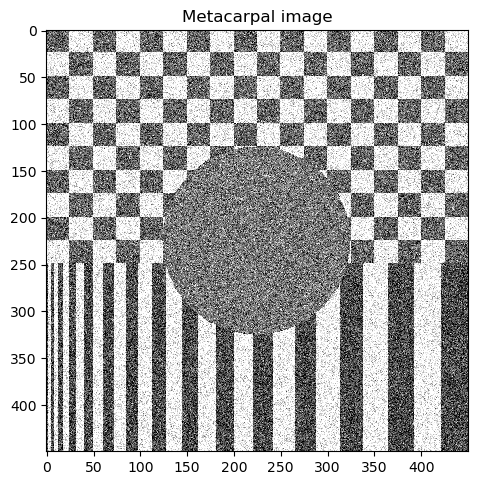

In [72]:

in_dir = "data/"

# X-ray image
im_name = "Gaussian.png"

im_org = io.imread(in_dir + im_name, as_gray = True)

io.imshow(im_org)
plt.title('Metacarpal image')
io.show()

In [46]:
im_org.shape

(450, 450, 3)

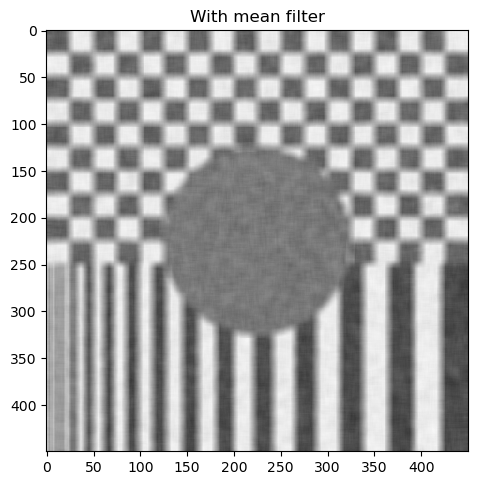

In [76]:
size = 10
# Two dimensional filter filled with 1
weights = np.ones([size, size])
# Normalize weights
weights = weights / np.sum(weights)
#print(weights)

res_img = correlate(im_org, weights)

io.imshow(res_img)
plt.title('With mean filter')
io.show()

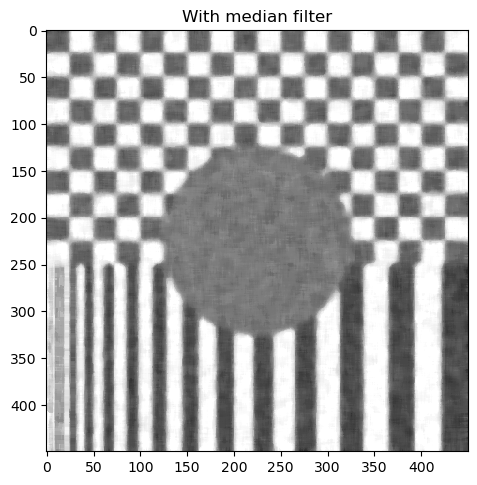

In [78]:
size = 10
footprint = np.ones([size, size])
med_img = median(im_org, footprint)

io.imshow(med_img)
plt.title('With median filter')
io.show()

## compare mean and median filter

Text(0.5, 1.0, 'Median Filter')

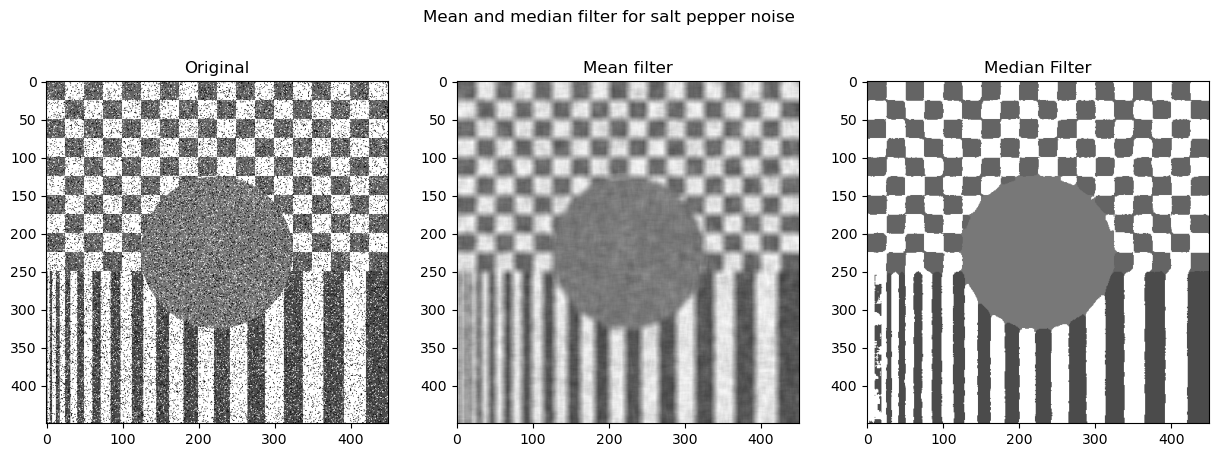

In [85]:

in_dir = "data/"

# salt pepper
im_name = "SaltPepper.png"

im_org = io.imread(in_dir + im_name)

f, axarr = plt.subplots(1, 3, figsize=(15, 5))
f.suptitle("Mean and median filter for salt pepper noise")
axarr[0].imshow(im_org)
axarr[0].set_title("Original")
size = 10
weights = np.ones([size, size, 3])
weights = weights / np.sum(weights)
res_img = correlate(im_org, weights)
axarr[1].imshow(res_img)
axarr[1].set_title("Mean filter")
size = 10
footprint = np.ones([size, size, 3])
med_img = median(im_org, footprint)
axarr[2].imshow(med_img)
axarr[2].set_title("Median Filter")


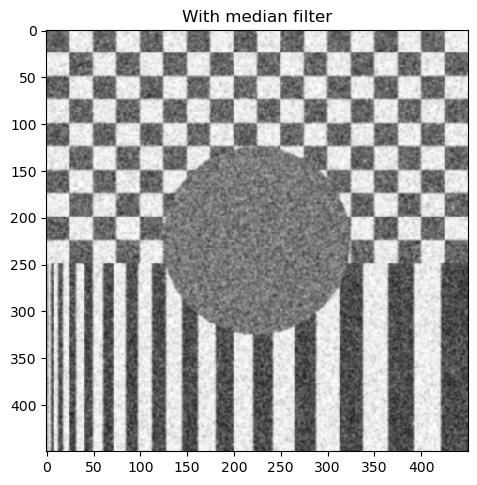

In [84]:
sigma = 1
gauss_img = gaussian(im_org, sigma)
io.imshow(gauss_img)
plt.title('With median filter')
io.show()